# Plot the regret results

We want to compare the following methods:
    
    [1] LSVI-UCB

    [2] RLSVI 
    
    [3] adaptive epsilon-greedy


**Settings**:

[a]. To see the regret does not scale with S, we try different S --- S = 100, 200, 400. 

[b]. We also try the same setting with misspecification probability = 0.05 

datasets in the file are ['ID', 'accu_result_eps', 'episode_accu_result_eps', 'accu_result_adeps', 'episode_accu_result_adeps', 'accu_result_opt', 'episode_accu_result_opt', 'accu_result_random', 'episode_accu_result_random', 'accu_result_ucb', 'episode_accu_result_ucb', 'accu_result_rlsvi1', 'episode_accu_result_lsvi1', 'accu_result_rlsvi2', 'episode_accu_result_lsvi2']
(4, 3000)


Text(0.5, 1.0, 'regret')

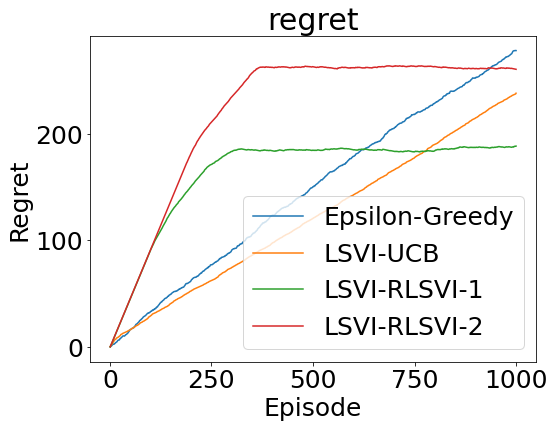

In [30]:
import numpy as np
from numba import jit
import matplotlib.pyplot as plt

path_to_data = './new_regret_result/'


plt.rcParams.update({'font.size': 25})


# load data 
## how the data is stored
##    np.savez( file_name2, ID=exp_id, num_epi = num_epi, regret_eps = np.asarray(regret_eps),regret_adeps = np.asarray(regret_adeps),regret_rlsvi1 = np.asarray(regret_rlsvi1), regret_rlsvi2 = np.asarray(regret_rlsvi2), regret_ucb = np.asarray(regret_ucb) )
##



# number of episodes 
num_epi = 3000
num_id = 5 # number of experiments of the same size 

 
# load data 
regret_result_s100_id1 = np.load(path_to_data+'regret_result_s100_a5_h10_d10_mis0_id1.npz')
result_s100_id1 = np.load(path_to_data + 'result_s100_a5_h10_d10_mis0_id1.npz')

print("datasets in the file are", result_s100_id1.files)

eps = result_s100_id1['episode_accu_result_eps'] # epsilon greedy 
adeps = result_s100_id1['episode_accu_result_adeps']
ucb = result_s100_id1['episode_accu_result_ucb'] # LSVI-UCB
optimal = result_s100_id1['episode_accu_result_opt'] # optimal policy 
rlsvi1 = result_s100_id1['episode_accu_result_lsvi1']
rlsvi2 = result_s100_id1['episode_accu_result_lsvi2']

mean_eps = np.asarray(eps).mean(axis= 0)
mean_adeps = np.asarray(adeps).mean(axis=0)
mean_ucb = np.asarray(ucb).mean(axis=0)
mean_rlsvi1= np.asarray(rlsvi1).mean(axis=0)
mean_rlsvi2 = np.asarray(rlsvi2).mean(axis=0)

print(np.shape(result_s100_id1["episode_accu_result_eps"]))
# ucb = result_s100_id1['episode_accu_result_ucb']

max_reward = max(np.max(optimal), np.max(ucb)) / num_epi 
regret_benchmark = np.asarray(range(1, num_epi + 1)) * max_reward 


regret_adeps = regret_benchmark - mean_adeps
regret_ucb = regret_benchmark - mean_ucb
regret_rls1 = regret_benchmark - mean_rlsvi1
regret_rls2 = regret_benchmark - mean_rlsvi2

num_plot = 1000
hori_plot = range(1, num_plot + 1)
plt.figure(figsize=(8,6))
y = range(1, num_plot + 1)
# plt.plot(y, eps,  label='Epsilon-Greedy')
plt.plot(y, regret_adeps[range(0, num_plot)], label='Epsilon-Greedy')
plt.plot(y, regret_ucb[range(0, num_plot)], label='LSVI-UCB')
plt.plot(y, regret_rls1[range(0, num_plot)], label='LSVI-RLSVI-1')
plt.plot(y, regret_rls2[range(0, num_plot)], label='LSVI-RLSVI-2')
plt.xlabel('Episode')
plt.ylabel('Regret')
plt.legend()
plt.title('regret')

#### We plot the indivdual figures for all cases and rule out the cases where LSVI is bad 




In [10]:
def plot_figure(S=100, mis=0, id=1,  num_epi=3000, show_plot=True):
    # S = 100, 200, 400
    # mis = 0, 50
    name_file = './new_regret_result/regret_result_s'+str(S)+'_a5_h10_d10_mis'+str(mis)+'_id'+str(id)+'.npz'

    dataset = np.load(name_file)
    if show_plot:
        plt.figure()
        y = [_ for _ in range(1, num_epi + 1)]
        plt.plot(y, dataset["regret_eps"], label='Epsilon-Greedy')
        plt.plot(y, dataset["regret_adeps"], label='Ada-Epsilon-Greedy')
        plt.plot(y, dataset["regret_ucb"], label='LSVI-UCB')
        plt.plot(y, dataset["regret_rlsvi1"], label='LSVI-RLSVI-1')
        plt.plot(y, dataset["regret_rlsvi2"], label='LSVI-RLSVI-2')
        plt.xlabel('Episode')
        plt.ylabel('Regret')
        plt.legend()
        plt.title('regret_s'+str(S)+'_a5_h10_d10_mis'+str(mis)+'_id'+str(id))

    if (dataset["regret_adeps"][-1] < dataset["regret_ucb"][-1] or 3* dataset["regret_rlsvi1"][-1] < dataset["regret_ucb"][-1]):
        print('Suspicious case: s'+str(S)+'_a5_h10_d10_mis'+str(mis)+'_id'+str(id))




# run the test for all cases 

for S in [100, 200, 400]:
    for mis in [0, 50]:
        for id in range(1, 11):
            plot_figure(S, mis, id, show_plot=False)

Suspicious case: s100_a5_h10_d10_mis0_id1
Suspicious case: s100_a5_h10_d10_mis0_id2
Suspicious case: s100_a5_h10_d10_mis0_id6
Suspicious case: s100_a5_h10_d10_mis0_id10
Suspicious case: s100_a5_h10_d10_mis50_id7
Suspicious case: s100_a5_h10_d10_mis50_id8
Suspicious case: s100_a5_h10_d10_mis50_id10
Suspicious case: s200_a5_h10_d10_mis0_id1
Suspicious case: s200_a5_h10_d10_mis0_id2
Suspicious case: s200_a5_h10_d10_mis0_id7
Suspicious case: s200_a5_h10_d10_mis50_id4
Suspicious case: s200_a5_h10_d10_mis50_id5
Suspicious case: s200_a5_h10_d10_mis50_id8
Suspicious case: s400_a5_h10_d10_mis50_id1
Suspicious case: s400_a5_h10_d10_mis50_id4
Suspicious case: s400_a5_h10_d10_mis50_id6


In [13]:
# load all data for the well-specified case 

def process_data():
    for S in [100, 200, 400]:
        for mis in [0, 50]:
            num_epi = 3000
            regret_adeps = np.zeros(num_epi,)
            regret_rlsvi1 = np.zeros(num_epi,)
            regret_rlsvi2 = np.zeros(num_epi,)
            regret_ucb = np.zeros(num_epi,)
            count = 0 

            for id in range(1, 11):
                # print(id)
                name_file = './new_regret_result/regret_result_s'+str(S)+'_a5_h10_d10_mis'+str(mis)+'_id'+str(id)+'.npz'
                
                dataset = np.load(name_file)

                # print('s'+str(S)+'_a5_h10_d10_mis'+str(mis)+'_id'+str(id))
                # print(dataset["regret_adeps"][-1], dataset["regret_rlsvi1"][-1], dataset["regret_rlsvi2"][-1], "ucb" ,dataset["regret_ucb"][-1] )


                if np.min([dataset["regret_adeps"][-1], 1.5* dataset["regret_rlsvi1"][-1], 1.5* dataset["regret_rlsvi2"][-1]]) > dataset["regret_ucb"][-1]:
                    count = count + 1 
                    regret_adeps = regret_adeps + dataset["regret_adeps"]
                    regret_rlsvi1 = regret_rlsvi1 + dataset["regret_rlsvi1"]
                    regret_rlsvi2 = regret_rlsvi2 + dataset["regret_rlsvi2"]
                    regret_ucb = regret_ucb + dataset["regret_ucb"]
                
                
            if(id == 5 and count == 0):
                print('we have trouble at s_s'+str(S)+'_a5_h10_d10_mis'+str(mis))
            else:

                regret_adeps = regret_adeps / count 
                regret_rlsvi1 = regret_rlsvi1 / count 
                regret_rlsvi2 = regret_rlsvi2 / count 
                regret_ucb = regret_ucb / count 

                # smoothing 

                
                
                if regret_rlsvi1[-1] > regret_rlsvi2[-1]:
                    regret_rlsvi = regret_rlsvi2
                else:
                    regret_rlsvi = regret_rlsvi1

                file_name = "./new_regret_result/processed_result_s"+str(S) + "_mis" + str(int(mis)) + ".npz"
                
                np.savez(file_name, num_epi = 3000, regret_adeps = np.asarray(regret_adeps), regret_rlsvi = np.asarray(regret_rlsvi), regret_ucb = np.asarray(regret_ucb))


process_data()


                

Text(0.5, 1.0, 'regret')

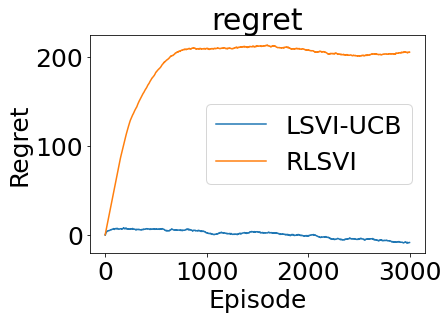

In [15]:
## plot figures 

num_epi = 3000


# plot 1, 2, 3: fix S, compare the methods 
S = 100
mis=50 
file_name = "./new_regret_result/processed_result_s"+str(S) + "_mis" + str(int(mis)) + ".npz"
result = np.load(file_name)

plt.figure()
y = [_ for _ in range(1, num_epi + 1)]
# plt.plot(y, result["regret_adeps"], label='Ada-Epsilon-Greedy')
plt.plot(y, result["regret_ucb"], label='LSVI-UCB')
plt.plot(y, result["regret_rlsvi"], label='RLSVI')
plt.xlabel('Episode')
plt.ylabel('Regret')
plt.legend()
plt.title('regret')




In [1]:
# figure showing different S 
S = [100, 200, 400] 
mis=50 
file_name1 = "./new_regret_result/processed_result_s"+str(S[0]) + "_mis" + str(int(mis)) + ".npz"
file_name2 = "./new_regret_result/processed_result_s"+str(S[1]) + "_mis" + str(int(mis)) + ".npz"
file_name3 = "./new_regret_result/processed_result_s"+str(S[2]) + "_mis" + str(int(mis)) + ".npz"
result1 = np.load(file_name1)
result2 = np.load(file_name2)
result3 = np.load(file_name3)

plt.figure()
y = [_ for _ in range(1, num_epi + 1)]
plt.plot(y, result1["regret_ucb"], label='UCB, S=100')
plt.plot(y, result2["regret_ucb"], label='UCB, S=100')
plt.plot(y, result3["regret_ucb"], label='UCB, S=100')

# plt.plot(y, result1["regret_rlsvi"], label='RLSVI, S=100')
# plt.plot(y, result2["regret_rlsvi"], label='RLSVI, S=100')
# plt.plot(y, result3["regret_rlsvi"], label='RLSVI, S=100')

plt.xlabel('Episode')
plt.ylabel('Regret')
plt.legend()
plt.title('regret')



NameError: name 'np' is not defined

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Suppose you saved regrets for standard and group cases
standard_regret = np.load('standard_regret.npz')['regret']
group_regret = np.load('group_regret.npz')['regret']

plt.figure(figsize=(6,4))
plt.plot(standard_regret, label='Standard Features (dim d)')
plt.plot(group_regret, label='Group-Invariant Features (dim d_G)')
plt.xlabel('Episode')
plt.ylabel('Cumulative Regret')
plt.title('Regret Comparison: Standard vs Group-Invariant')
plt.legend()
plt.grid(True)
plt.show()
